# Polynomial Regression

Polynomial regression is a type of regression analysis where the relationship between the independent variable \( x \) and the dependent variable \( y \) is modeled as an \( n \)-th degree polynomial. Unlike linear regression, which fits a straight line to the data, polynomial regression can fit a curve. This makes it useful for modeling more complex relationships.

## General Form

The general form of a polynomial regression model is:

$$
y = b_0 + b_1x + b_2x^2 + \cdots + b_nx^n + \epsilon
$$

## Components

- $y$ is the dependent variable.
- $x$ is the independent variable.
- $b_0, b_1, \dots, b_n$ are the coefficients of the polynomial.
- $\epsilon$ is the error term.

## Key Considerations

Polynomial regression can capture the non-linear relationship between variables, making it a flexible tool for predictive modeling. However, it can also lead to overfitting if the degree of the polynomial is too high.


!["polynomial"](https://media.geeksforgeeks.org/wp-content/uploads/20240614192441/Linear-Regression-vs-Polynomial-Regression.webp)

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [318]:
dataset = pd.read_csv("icecream.csv")
dataset.head(3)

,Temperature,Sales
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001


In [319]:
# import random

# # Generate 1000 new records for "Salary" and "Level"
# new_salaries = [random.randint(30000, 1000000) for _ in range(1000)]
# new_levels = [random.randint(1, 10) for _ in range(1000)]

# # Add the new records to the DataFrame
# dataset = pd.concat([file, pd.DataFrame({'Salary': new_salaries, 'Level': new_levels})], ignore_index=True)
# dataset

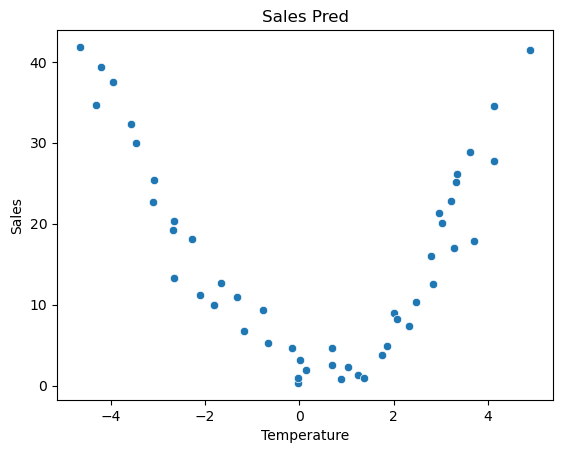

In [320]:
sns.scatterplot(x="Temperature",y="Sales",data=dataset)
plt.title("Sales Pred")
plt.show()

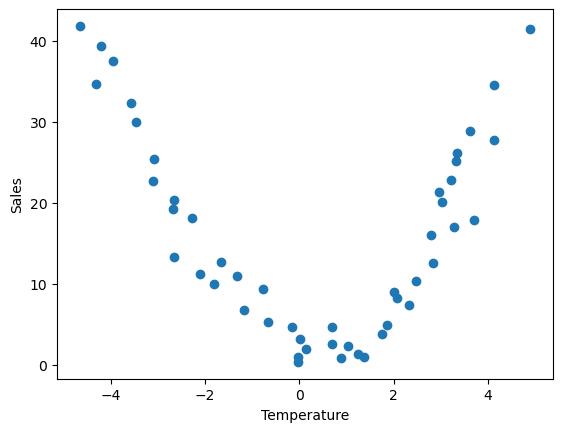

In [321]:
plt.scatter(x="Temperature",y="Sales",data=dataset)
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.show()

**``This graph show that it's polynomial regression``**
 ![Image](https://github.com/user-attachments/assets/5c6045d7-152b-46cb-aa68-944ec047da25)

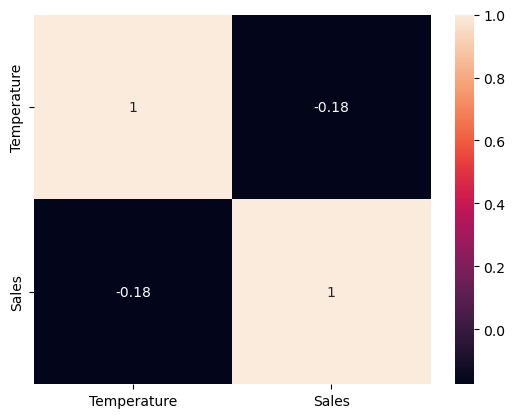

In [322]:
#use heatmap
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [323]:
x = dataset[["Temperature"]]
y = dataset["Sales"]
x.ndim

2

**``x must be multidimensional for polynomial regression``**

In [324]:
from sklearn.preprocessing import PolynomialFeatures

In [325]:
pf = PolynomialFeatures(degree=3)
pf.fit(x)
x = pf.transform(x)
x.shape

(49, 4)

In [326]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(39, 4)

In [327]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [328]:
acc = lr.score(x_test,y_test)
acc_t = lr.score(x_train,y_train)

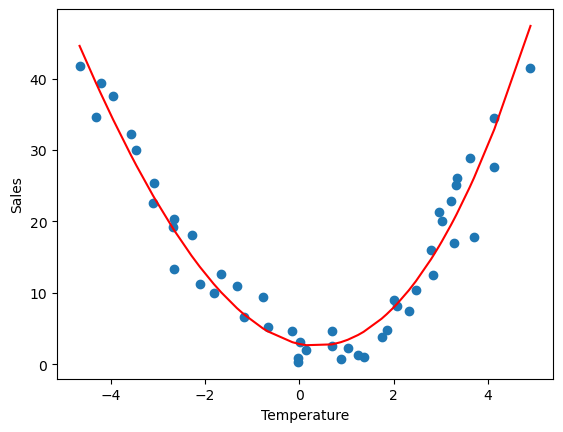

Accuracy Test: 84.05107688068185 %
Accuracy Train: 94.69116777727132 %


In [329]:

plt.scatter(x="Temperature",y="Sales",data=dataset)
plt.plot(dataset["Temperature"],lr.predict(x),c="red")
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.show()
print(f"Accuracy Test: {acc*100} %")
print(f"Accuracy Train: {acc_t*100} %")


In [330]:
x

array([[ 1.00000000e+00, -4.66226268e+00,  2.17366933e+01,
        -1.01342174e+02],
       [ 1.00000000e+00, -4.31655945e+00,  1.86326855e+01,
        -8.04290944e+01],
       [ 1.00000000e+00, -4.21398477e+00,  1.77576676e+01,
        -7.48305407e+01],
       [ 1.00000000e+00, -3.94966109e+00,  1.55998227e+01,
        -6.16140128e+01],
       [ 1.00000000e+00, -3.57855372e+00,  1.28060467e+01,
        -4.58271260e+01],
       [ 1.00000000e+00, -3.45571170e+00,  1.19419433e+01,
        -4.12679133e+01],
       [ 1.00000000e+00, -3.10844012e+00,  9.66239999e+00,
        -3.00349918e+01],
       [ 1.00000000e+00, -3.08130332e+00,  9.49443017e+00,
        -2.92552193e+01],
       [ 1.00000000e+00, -2.67246083e+00,  7.14204687e+00,
        -1.90868405e+01],
       [ 1.00000000e+00, -2.65228679e+00,  7.03462523e+00,
        -1.86578436e+01],
       [ 1.00000000e+00, -2.65149803e+00,  7.03044182e+00,
        -1.86412027e+01],
       [ 1.00000000e+00, -2.28826400e+00,  5.23615212e+00,
      

In [331]:
x[0]

array([   1.        ,   -4.66226268,   21.73669327, -101.34217375])

In [332]:
lr.coef_

array([ 0.        , -1.39956426,  1.87501919,  0.05451597])

In [333]:
lr.intercept_

2.840530986546746

In [334]:
y_predict = lr.predict(x)
y_predict

array([44.5976176 , 39.43380624, 37.95478168, 34.25935494, 29.36222008,
       27.81863429, 23.67079145, 23.36037519, 18.93174901, 18.7254837 ,
       18.717443  , 15.20779533, 13.64532006, 11.26173782, 10.08373315,
        7.86835805,  6.97481333,  5.0189787 ,  4.61796941,  3.09175474,
        2.89358295,  2.89012169,  2.82862292,  2.67359891,  2.78389707,
        2.79001857,  3.08780469,  3.43248573,  4.09453538,  4.54154182,
        6.36928877,  7.01713112,  7.97294977,  8.49733252, 10.35487493,
       11.66167688, 14.66173292, 15.15074966, 16.53906828, 17.22632239,
       19.48833371, 20.22009783, 20.80572292, 21.06156388, 24.79940325,
       26.15229743, 32.89737369, 32.94239668, 47.39538471])

In [335]:
# y_man = lr.coef_[0]*x[0][0] + lr.coef_[1]*x[0][1]+ pow((lr.coef_[2]*x[0][2]), 2)+lr.intercept_
# print(f"Manually Predict :{y_man}")

In [336]:
test = pf.transform([[3.335932412]])
test1 = pf.transform([[-2.652286793]])
test


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 1.        ,  3.33593241, 11.12844506, 37.12374056]])

In [337]:
print(lr.predict(test))

print(lr.predict(test1))

[21.06156388]
[18.7254837]
